# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [22]:
df = pd.read_csv('Dataset_inisiasi.csv')
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0.015317,1,0.857143,0.0,0.838710,0,0.244828,0.0,0.336832,2
1,0.416400,1,0.357143,0.0,0.806452,0,0.451724,0.0,0.918055,2
2,0.139579,1,0.547619,1.0,0.016129,3,0.158621,0.0,0.068637,4
3,0.204047,1,0.785714,1.0,0.129032,3,0.051724,0.0,0.569198,4
4,0.014608,0,0.023810,1.0,0.129032,3,0.648276,0.0,0.492591,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2282 non-null   float64
 1   TransactionType      2282 non-null   int64  
 2   Location             2282 non-null   float64
 3   Channel              2282 non-null   float64
 4   CustomerAge          2282 non-null   float64
 5   CustomerOccupation   2282 non-null   int64  
 6   TransactionDuration  2282 non-null   float64
 7   LoginAttempts        2282 non-null   float64
 8   AccountBalance       2282 non-null   float64
 9   Cluster              2282 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 178.4 KB


In [24]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
Cluster                0
dtype: int64


In [25]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2277,False
2278,False
2279,False
2280,False


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [42]:
# 3. Data Splitting (Pisahkan fitur dan target)
X = df.drop(columns=['Cluster'])  # Fitur
y = df['Cluster']  # Target klasifikasi

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(1825, 9), y_train=(1825,)
Test set shape: X_test=(457, 9), y_test=(457,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [48]:
# a. Membangun Model Klasifikasi dengan Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# a. Membangun Model Klasifikasi dengan SVM
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

1. Random Forest
- Akurasi tinggi & tahan overfitting karena menggabungkan banyak pohon.
- Dapat menangani fitur numerik & kategorikal.
2. SVM
- Cocok untuk data berdimensi tinggi.
- Tahan terhadap noise & outlier.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [52]:
# Prediksi menggunakan data uji
y_pred_rf = rf_model.predict(X_test)  # Random Forest
y_pred_svm = svm_model.predict(X_test)  # SVM

In [53]:
# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [54]:
# Print hasil evaluasi
print("🔹 Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest:
Accuracy: 1.0000
F1-Score: 1.0000

Confusion Matrix:
 [[169   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  91   0   0]
 [  0   0   0  45   0]
 [  0   0   0   0  93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        93

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



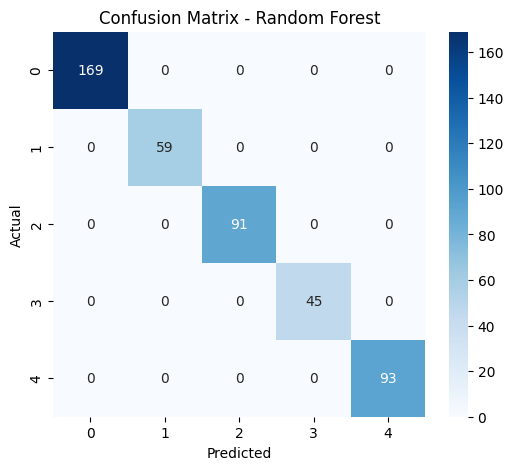

In [62]:
# Buat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
# Evaluasi SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

In [64]:
print("\n🔹 SVM:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM:
Accuracy: 1.0000
F1-Score: 1.0000

Confusion Matrix:
 [[169   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  91   0   0]
 [  0   0   0  45   0]
 [  0   0   0   0  93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        93

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



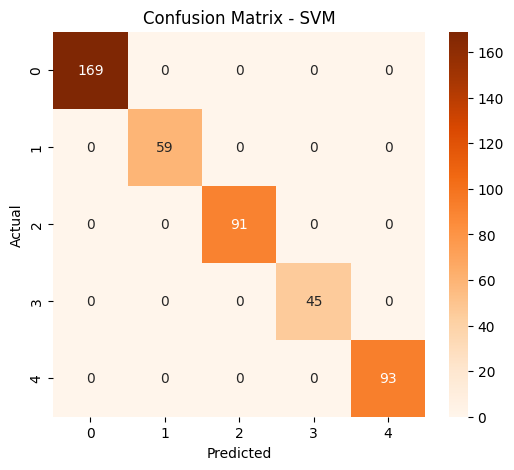

In [65]:
# Buat confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Hasil Evaluasi Algoritma

1. Random Forest
- Akurasi: 1.0000 (100%)
- Skor-F1: 1.0000 (100%)
- Matriks Konfusi: Semua prediksi benar, tidak ada kesalahan klasifikasi.
- Laporan Klasifikasi: Presisi, recall, dan skor-F1 untuk semua kelas adalah 1.00
2. SVM
- Akurasi: 1.0000 (100%)
- Skor-F1: 1.0000 (100%)
- Matriks Konfusi: Semua prediksi benar, tidak ada kesalahan klasifikasi.
- Laporan Klasifikasi: Presisi, recall, dan skor-F1 untuk semua kelas adalah 1.00.

### Perbandingan

- Kedua algoritma, Random Forest dan SVM, mencapai performa yang sempurna pada kumpulan data ini.
- Semua metrik evaluasi (akurasi, skor-F1, matriks konfusi, dan laporan klasifikasi) menunjukkan hasil yang identik dan sempurna.
- Secara teknis, berdasarkan metrik evaluasi yang diberikan, tidak ada perbedaan performa antara kedua algoritma.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [66]:
# Definisi parameter yang akan di-tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Melakukan tuning
grid_search_rf.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik Random Forest:", grid_search_rf.best_params_)

# Model Random Forest terbaik
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Parameter terbaik Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [67]:
# Definisi parameter yang akan di-tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Inisialisasi model SVM
svm = SVC(random_state=42)

# Inisialisasi GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2)

# Melakukan tuning
grid_search_svm.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik SVM:", grid_search_svm.best_params_)

# Model SVM terbaik
best_svm = grid_search_svm.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Parameter terbaik SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [68]:
# Evaluasi Random Forest
y_pred_rf = best_rf.predict(X_test)
print("Evaluasi Random Forest setelah tuning:")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred_rf))
print("Matriks konfusi:\n", confusion_matrix(y_test, y_pred_rf))

Evaluasi Random Forest setelah tuning:
Akurasi: 1.0
Laporan klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        93

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457

Matriks konfusi:
 [[169   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  91   0   0]
 [  0   0   0  45   0]
 [  0   0   0   0  93]]


In [69]:
# Evaluasi SVM
y_pred_svm = best_svm.predict(X_test)
print("\nEvaluasi SVM setelah tuning:")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred_svm))
print("Matriks konfusi:\n", confusion_matrix(y_test, y_pred_svm))


Evaluasi SVM setelah tuning:
Akurasi: 1.0
Laporan klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        93

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457

Matriks konfusi:
 [[169   0   0   0   0]
 [  0  59   0   0   0]
 [  0   0  91   0   0]
 [  0   0   0  45   0]
 [  0   0   0   0  93]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning:

- Random Forest:
  - Sebelum tuning: Akurasi 1.0, semua metrik 1.0, matriks konfusi sempurna.
  - Setelah tuning: Akurasi 1.0, semua metrik 1.0, - matriks konfusi sempurna.
  - Kesimpulan: Tuning tidak mengubah performa model.
- SVM:
  - Sebelum tuning: Akurasi 1.0, semua metrik 1.0, matriks konfusi sempurna.
  - Setelah tuning: Akurasi 1.0, semua metrik 1.0, matriks konfusi sempurna.
  - Kesimpulan: Tuning tidak mengubah performa model.

- Secara keseluruhan, dapat disimpulkan bahwa, tuning tidak mengubah performa kedua model. Hal ini mengindikasikan bahwa hyperparameter awal sudah optimal atau data sangat mudah dipisahkan.



2. Identifikasi Kelemahan Model:

- Precision atau Recall Rendah:
  - Tidak ada kelas dengan precision atau recall rendah karena semua metrik adalah 1.0.
- Overfitting atau Underfitting:
  - Kemungkinan besar model mengalami overfitting. Akurasi 1.0 pada data pengujian sangat mencurigakan.
  - Model mungkin terlalu cocok dengan data pelatihan dan tidak dapat menggeneralisasi dengan baik pada data baru yang tidak terlihat.
  - Underfitting tidak mungkin terjadi, karena semua metrik menunjukan nilai sempurna.
  


3. Rekomendasi Tindakan Lanjutan:

- Validasi Silang yang Lebih Ketat:
  - Gunakan teknik validasi silang seperti k-fold cross-validation dengan jumlah fold yang lebih besar untuk mendapatkan estimasi performa yang lebih andal.
- Pengujian pada Data Baru:
  - Jika memungkinkan, uji model pada kumpulan data yang benar-benar baru dan berbeda dari data pelatihan dan pengujian yang digunakan saat ini.
- Pengumpulan Data Tambahan:
  - Jika memungkinkan, kumpulkan data tambahan untuk meningkatkan variasi dan representasi data.
- Pertimbangkan Algoritma Lain:
  - Meskipun Random Forest dan SVM menunjukkan performa yang baik, coba algoritma lain seperti Gradient Boosting atau Neural Networks untuk melihat apakah ada peningkatan.